In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using CNN

In [ ]:
!pip install emot --upgrade
# to convert emojis to text
!pip install emoji
#to expand a contracted words
!pip install demoji
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=159d415177f5336d3fd45258c20dd80ec434aad7a9c43e4b0f018da06e048678
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
import emot
import nltk.data
import numpy as np
import pandas as pd
import re
import time
import string
import emoji
import demoji
import contractions
import nltk
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option("max_colwidth" ,220)
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
demoji.download_codes()
def emo(text):
  temp=emoji.demojize(text,delimiters=(" "," "))
  temp=temp.replace("_","  ")
  return temp

<ipython-input-15-e00aa54160fe>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
demoji.download_codes()
def emo(text):
  try:
   temp=emoji.demojize(str(text),delimiters=(" "," "))
   temp=temp.replace("_","  ")
   return temp
  except IndexError:
        return ""

<ipython-input-16-82a5fb4117d1>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
punct="!#$%&\'()*+,-.’’/:;<=>?@[\\]^_`{|}~’“‘"

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

In [ ]:
def clean_text(text):
    text = re.sub('@[a-zA-Z0-9]*', '', str(text))#to remove @ and its following word
    text = contractions.fix(text, slang=True)
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #to remove punctuation
    text="".join([word.lower() for word in text if word not in punct])
    text = "".join([word for word in text if not word.isdigit()])#to remove digit
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

In [ ]:
import pandas as pd


In [ ]:
bodo_train=pd.read_csv('/content/drive/MyDrive/hasoc/task4/bodo/train_BO_AH_HASOC2023.csv')
bodo_test=pd.read_csv('/content/drive/MyDrive/hasoc/task4/bodo/test_BO_AH_HASOC2023.csv')

In [ ]:
bodo_train['clean_text'] = bodo_train['text'].apply(lambda x:emo(x))
bodo_train['clean_text'] = bodo_train['clean_text'].apply(lambda x:remove_urls(x))
bodo_train['clean_text'] = bodo_train['clean_text'].apply(lambda x:clean_text(x))

In [ ]:
# build train and test datasets
txt = bodo_train['clean_text'].values
lab = bodo_train['task_1'].values

train_reviews = txt[:960]
train_sentiments = lab[:960]

test_reviews = txt[960:]
test_sentiments = lab[960:]

In [ ]:
#split the dataset into train and test sets
X_train1, X_test1, y_train1, y_test1= train_test_split(bodo_train.clean_text,bodo_train.task_1,test_size=0.25, random_state=42)

In [ ]:
X_train1.shape, X_test1.shape

((1259,), (420,))

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(train_reviews)
t.word_index['<PAD>'] = 0

In [ ]:
t.word_index

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('बिदाय', 3183), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(train_reviews)

In [ ]:
train_sequences

In [ ]:
test_sequences = t.texts_to_sequences(test_reviews)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=3184
Number of Documents=960


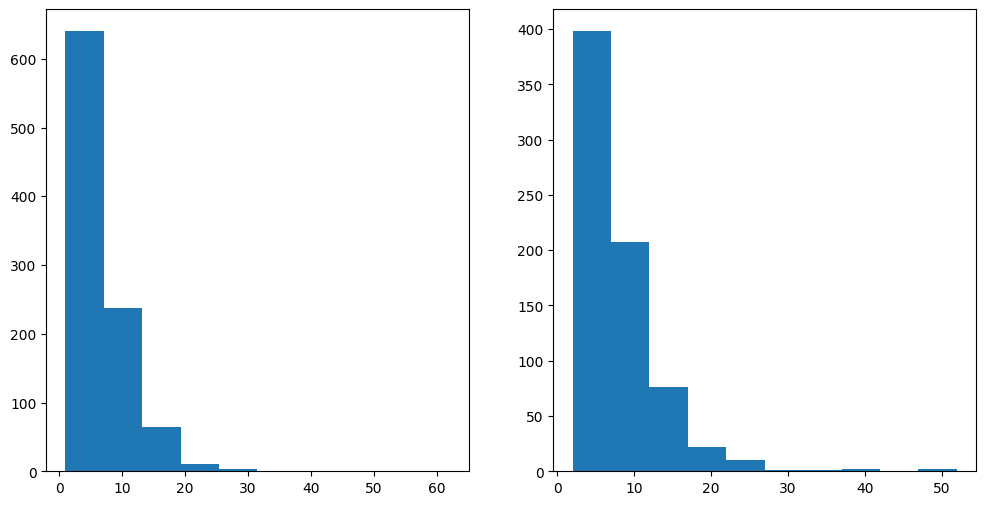

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((960, 1000), (719, 1000))

In [ ]:
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [ ]:
y_train = le.fit_transform(train_sentiments)
y_test = le.transform(test_sentiments)

In [ ]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
tt = [1,1,1, 0, 1]
print(le.inverse_transform(tt))

['NOT' 'NOT' 'NOT' 'HOF' 'NOT']


In [ ]:
VOCAB_SIZE = len(t.word_index)

In [ ]:
EMBED_SIZE = 300
EPOCHS=5
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         955200    
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           8

In [ ]:
# Fit the model
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1)

Epoch 1/5
7/7 [==============================] - 29s 4s/step - loss: 0.6731 - accuracy: 0.6111 - val_loss: 0.6868 - val_accuracy: 0.5521
Epoch 2/5
7/7 [==============================] - 31s 4s/step - loss: 0.6671 - accuracy: 0.6111 - val_loss: 0.6843 - val_accuracy: 0.5521
Epoch 3/5
7/7 [==============================] - 28s 4s/step - loss: 0.6040 - accuracy: 0.6343 - val_loss: 0.6307 - val_accuracy: 0.6667
Epoch 4/5
7/7 [==============================] - 28s 4s/step - loss: 0.3419 - accuracy: 0.9074 - val_loss: 0.7169 - val_accuracy: 0.6562
Epoch 5/5
7/7 [==============================] - 27s 4s/step - loss: 0.0704 - accuracy: 0.9815 - val_loss: 1.1253 - val_accuracy: 0.6771


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

23/23 [==============================] - 5s 220ms/step - loss: 0.8328 - accuracy: 0.7705
Accuracy: 77.05%


In [ ]:
# predictions = model.predict_classes(X_test1).ravel()
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions[:10]

23/23 [==============================] - 7s 320ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
predictions = ['HOF' if item == 1 else 'NOT' for item in predictions]
predictions[:10]

['NOT', 'NOT', 'HOF', 'HOF', 'NOT', 'NOT', 'HOF', 'NOT', 'HOF', 'HOF']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['NOT', 'HOF']
print(classification_report(test_sentiments, predictions))
pd.DataFrame(confusion_matrix(test_sentiments, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

         HOF       0.27      0.19      0.22       417
         NOT       0.20      0.28      0.24       302

    accuracy                           0.23       719
   macro avg       0.24      0.24      0.23       719
weighted avg       0.24      0.23      0.23       719



,NOT,HOF
NOT,79,338
HOF,216,86
